# 1. Bernoulli Event Generator

$P(C_1 = 1) = \frac{c_{y}}{c_{x} + c_{y}}$  
$P(C_1 = 0) = \frac{c_{x}}{c_{x} + c_{y}}$  
$P(C_1 = 1, C_2 = 1) = \frac{c_{y}p_{y}}{c_{x} + c_{y}}$  
$P(C_1 = 1, C_2 = 0) = \frac{c_{y}(1 - p_{y})}{c_{x} + c_{y}}$  
$P(C_1 = 0, C_2 = 1) = \frac{c_{x}p_{x}}{c_{x} + c_{y}}$  
$P(C_1 = 0, C_2 = 0) = \frac{c_{x}(1 - p_{x})}{c_{x} + c_{y}}$ 
Consider a trial, probability of obtaining 1 is $\frac{c_{y}p_{y}}{c_{x} + c_{y}}$ (As, we need both $C_1 = C_2 = 1$)  
Similarly, probability of obtaining 0 is $\frac{c_{x}p_{x}}{c_{x} + c_{y}}$  
In other cases, we just repeat the event, probability of which is $ \frac{c_{y}(1 - p_{y}) + c_{x}(1 - p_{x})}{c_{x} + c_{y}}$.  
So, probability of returning 1 is $ \sum_{n=0}^{\infty} (\frac{c_{y}p_{y}}{c_{x} + c_{y}})(\frac{c_{y}(1 - p_{y}) + c_{x}(1 - p_{x})}{c_{x} + c_{y}})^n $ = $ \frac{\frac{c_{y}p_{y}}{c_{x} + c_{y}}}{1 - \frac{c_{y}(1 - p_{y}) + c_{x}(1 - p_{x})}{c_{x} + c_{y}}} $ = $\frac{c_{y}p_{y}}{c_{x}p_{x} + c_{y}p_{y}}$  
Similarly, probability of returning 0 is $\frac{c_{x}p_{x}}{c_{x}p_{x} + c_{y}p_{y}}$  
Hence, the given algorithm generates a Bern($\frac{c_{y}p_{y}}{c_{x}p_{x} + c_{y}p{y}}$) event.

In [37]:
using Distributions
using Plots

In [42]:
c_y = 1
c_x = 40
p = c_y/(c_x + c_y)
p_x = 0.9
p_y = 0.1

function bernoulli_event(prob)
    v = rand()
    if v < prob
        return 0
    else
        return 1
    end
end

bernoulli_event (generic function with 1 method)

In [43]:
function genrate(iter)
    iter = iter + 1
    C_1 = bernoulli_event(p)
    if p == 1
        C_2 = bernoulli_event(p_y)
        if C_2 == 1
            return iter
        else
            return genrate(iter)
        end
    else
        C_2 = bernoulli_event(p_x)
        if C_2 == 1
            return iter
        else
            return genrate(iter)
        end
    end
end

genrate (generic function with 1 method)

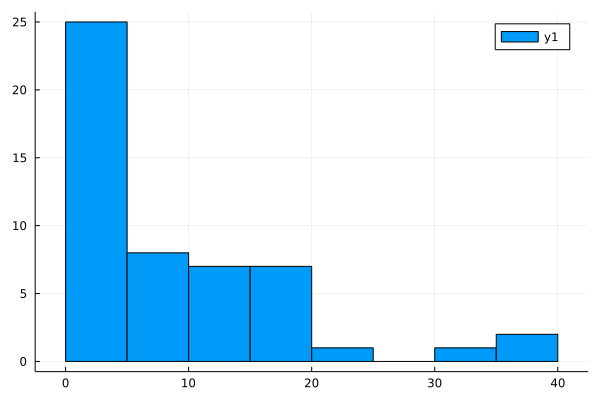

In [47]:
y = []
for i in 0:50
    push!(y, genrate(0))
end
plot(histogram(y))

# 2. Uniform Sampling from p-dimensional Sphere

# 3. Sampling from Truncated standard normal distribution

In [98]:
function samplin(a)
    y = []
    i = 0
    c = 2*(cdf.(Normal(), a) - cdf.(Normal(), -a))
    while i < 1000
        u = rand(Uniform(0,1))
        x = rand(Normal())
        while (abs(x) > a)
            x = rand(Normal())
        end
        q = exp(-x*x/2)/(sqrt(2*pi)*(cdf.(Normal(), a) - cdf.(Normal(), -a)))
        p = pdf(Normal(), x)
        if((p/q) > c)
            c = c + 0.01
        end
        if(u < (p/(c*q)))
            append!(y, x)
            i = i + 1
        end
    end
        println("Average is: ", mean(y))
        println("Expectation is: ", 0) 
        println("Variance is: ", var(y))

    plot(histogram(y))
end

samplin (generic function with 1 method)

Average is: 0.02820724135299706
Expectation is: 0
Variance is: 0.29070545478723686


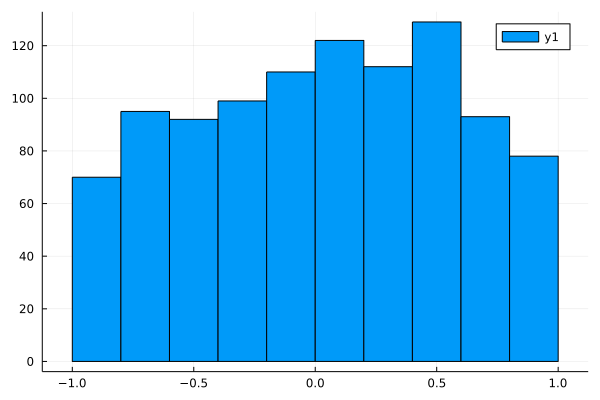

In [99]:
samplin(1)

Average is: 0.002712357525315433
Expectation is: 0
Variance is: 0.9828531556066379


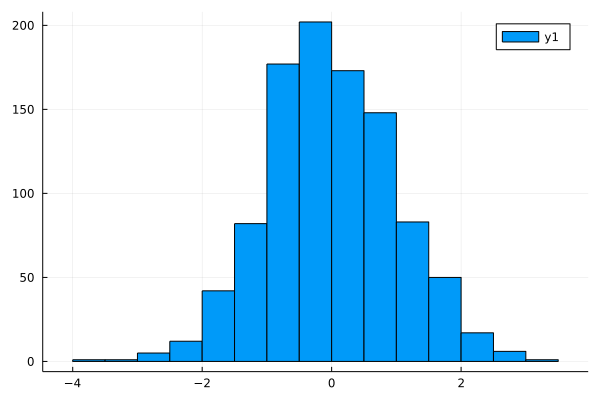

In [100]:
samplin(4)